<a href="https://colab.research.google.com/github/vishalrazdan29/data_playground/blob/main/apollo_hospitals_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***APOLLO HOSPITALS***

**Apollo Hospitals** was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

How can you help here?

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

Column Profiling

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female


Viral Load: Viral load refers to the amount of virus in an infected person's blood


Severity Level: This is an integer indicating how severe the patient is


Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.


Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest


Hospitalization charges: Individual medical costs billed to health insurance

DATA SET-[LINK](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


Non Null 1338 for each column means no null data is present.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.0000,5.00
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


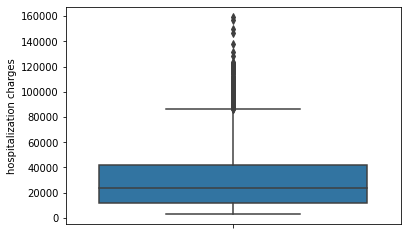

In [7]:
sns.boxplot(y=df['hospitalization charges'])

In [8]:
per25=df['hospitalization charges'].quantile(0.25)
per75=df['hospitalization charges'].quantile(0.75)
IQR=per75-per25

In [9]:
df=df[(df['hospitalization charges']< per75 + 1.5*IQR)]

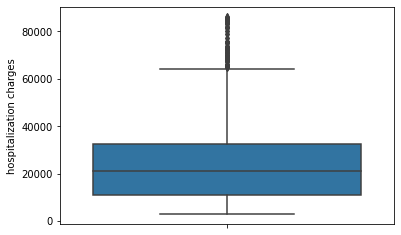

In [10]:
sns.boxplot(y=df['hospitalization charges'])

In [11]:
df.shape

(1199, 7)

In [12]:
df.quantile(0.25)

age                           26.0
viral load                     8.6
severity level                 0.0
hospitalization charges    11022.0
Name: 0.25, dtype: float64

In [13]:
df['viral load'].describe()

count    1199.000000
mean       10.031802
std         2.003572
min         5.320000
25%         8.600000
50%         9.910000
75%        11.270000
max        17.710000
Name: viral load, dtype: float64

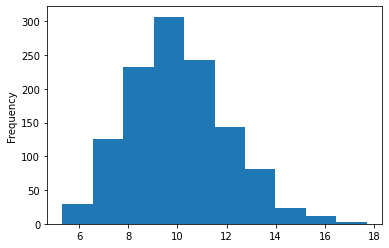

In [14]:
df['viral load'].plot.hist()

In [15]:
df['age'].describe()

count    1199.000000
mean       38.989992
std        14.068040
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

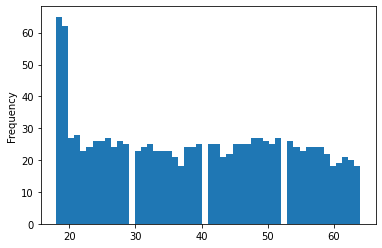

In [16]:
df['age'].plot.hist(bins=50)

Comparitively more data is present for people in the age group 18-21

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


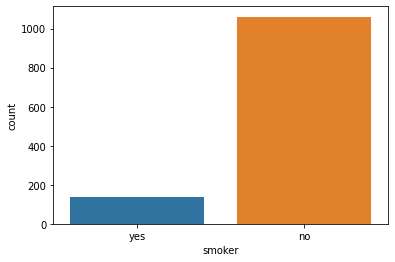

In [17]:
# df['smoker'].value_counts()
sns.countplot(df['smoker'])

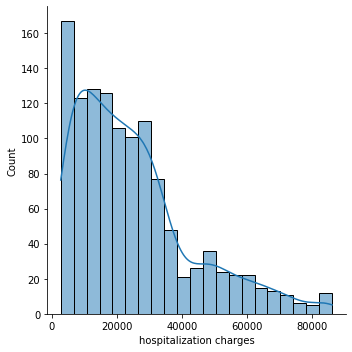

In [18]:
sns.displot(df['hospitalization charges'],kde=True)

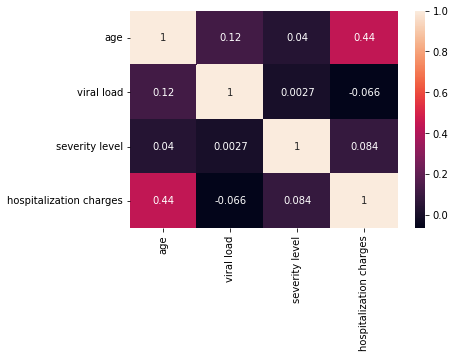

In [19]:
sns.heatmap(df.corr(),annot=True)

Very Clearly seen that no two features correlate with one another.

In [20]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


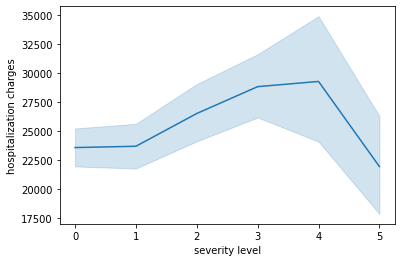

In [21]:
sns.lineplot(df['severity level'],df['hospitalization charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


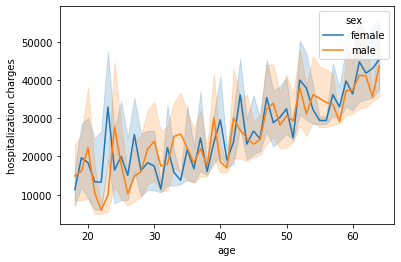

In [22]:
# df['age'].value_counts().plot.hist(kde=True)

sns.lineplot(df['age'],df['hospitalization charges'],hue=df['sex'])

This plot gives intution that hospitalisation charge increases with age
and males are more prone.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


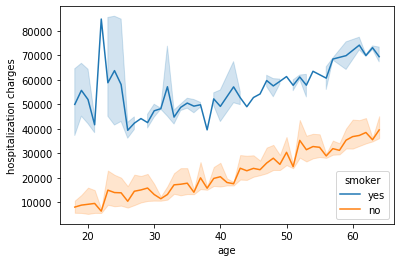

In [23]:
sns.lineplot(df['age'],df['hospitalization charges'],hue=df['smoker'])

Very clear from the graph that smokers tend to spend more(nearly more than double) during hospitalisation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


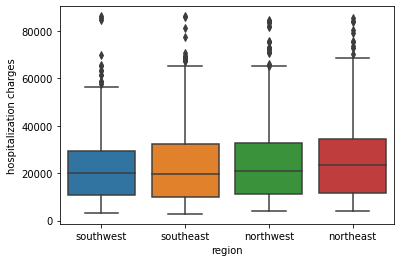

In [24]:
sns.boxplot(df['region'],df['hospitalization charges'])

In [25]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

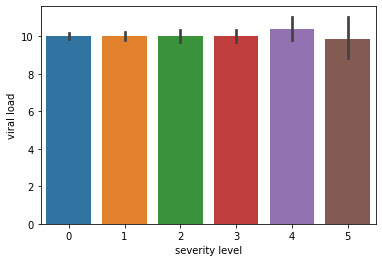

In [26]:
sns.barplot(x='severity level',y='viral load',data=df)

# **Hypothesis Testing:**

**Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?**

Null hypothesis: Smoker is independent of hospitalisation charge (No impact of smoking)

Alternate Hypothesis:Smoking affects hospitalisation charges.


In [27]:
def f(row):
  if row['smoker']=='yes':
    return 1
  else:
    return 0

In [28]:
df['is_smoker'] = df.apply(f, axis=1)

In [29]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker
0,19,female,yes,southwest,9.30,0,42212,1
1,18,male,no,southeast,11.26,1,4314,0
2,28,male,no,southeast,11.00,3,11124,0
3,33,male,no,northwest,7.57,0,54961,0
4,32,male,no,northwest,9.63,0,9667,0


In [30]:
df['hospitalization charges']

0       42212
1        4314
2       11124
3       54961
4        9667
        ...  
1333    26501
1334     5515
1335     4075
1336     5020
1337    72853
Name: hospitalization charges, Length: 1199, dtype: int64

Since T-test is done when sample size is small but when sample size increases t-test starts behaving like z-test.

***Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?(T-test Right tailed)***

**Null Hypothesis**-Smoking doesnot affect hospitalisation charges.

**Alternate Hypothesis**-Smoking increases hospitalisation charges.

**(T-test Right tailed)**

In [31]:
df['is_smoker'].value_counts()

0    1061
1     138
Name: is_smoker, dtype: int64

In [32]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker
0,19,female,yes,southwest,9.30,0,42212,1
1,18,male,no,southeast,11.26,1,4314,0
2,28,male,no,southeast,11.00,3,11124,0
3,33,male,no,northwest,7.57,0,54961,0
4,32,male,no,northwest,9.63,0,9667,0


Since we have to make sample size as same,so selecting keeping 138 as sample size of both the groups.

For T-test(Right Tailed)

Null Hypothesis: Smoker mean == Non Smoker Mean

Alternate Hypothesis: Smoker Mean > Non Smoker Mean

In [33]:
smoker_charge=df[df['smoker']=='yes']['hospitalization charges']
nonsmoker_charge=df[df['is_smoker']==0]['hospitalization charges'].sample(138)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


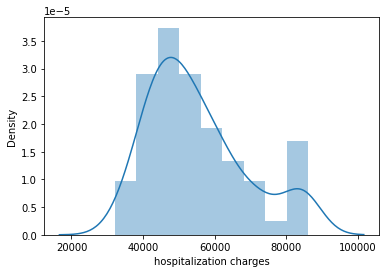

In [34]:
sns.distplot(smoker_charge)

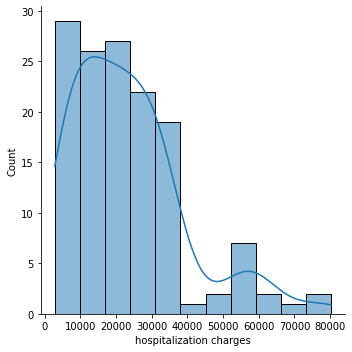

In [35]:
sns.displot(nonsmoker_charge,kde=True)

Here we could have used KS-test also to check the similarity between these two distributions.

In [36]:
from scipy import stats
stats.ttest_ind(smoker_charge, nonsmoker_charge)

Ttest_indResult(statistic=17.721081732211744, pvalue=2.403999345286364e-47)

In [37]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(smoker_charge, nonsmoker_charge)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(17.721081732211744, 2.8831455637643758e-70)

Since Alpha(Significance level)=0.05 or 5%.

Therefore, p-value(8.2 e-52) << Alpha (0.05)

We Reject Null Hypothesis.

**This means Smoking tends to increase hospitalisation charges of a person.**

and we are 95% sure of this.

***Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)***

In [38]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker
0,19,female,yes,southwest,9.30,0,42212,1
1,18,male,no,southeast,11.26,1,4314,0
2,28,male,no,southeast,11.00,3,11124,0
3,33,male,no,northwest,7.57,0,54961,0
4,32,male,no,northwest,9.63,0,9667,0


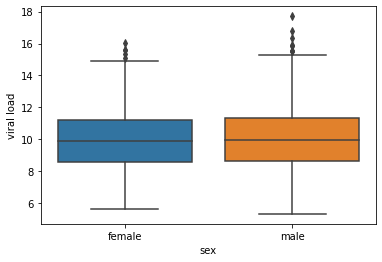

In [39]:
sns.boxplot(x='sex',y='viral load',data=df)

Visually it looks like viral load in both male and female is same.

In [40]:
f_viral_load=df[df['sex']=='female']['viral load']
m_viral_load=df[df['sex']=='male']['viral load']

In [41]:
f_viral_load.shape

(612,)

In [42]:
m_viral_load.shape

(587,)

In [43]:
f_viral_load=f_viral_load.sample(587)

Since we have to check that viral load is different in males and females.

So this will be a **2 tailed test**

**Null Hypothesis**: Viral load is same in males and females.

**Alternate Hypothesis**: Viral Load is different in males and females.

In [44]:
stats.ttest_ind(f_viral_load, m_viral_load)

Ttest_indResult(statistic=-0.7591484170968509, pvalue=0.4479164305344745)

In [45]:
ztest(f_viral_load, m_viral_load)

(-0.7591484170968509, 0.44776377883378504)

Since this is a two tailed test, therefore significance level will be 5% with 2.5% on either sides of the distribution.

ie either viral load of males can be greater than females or can be lesser.

Now p-val=0.46 >> significance level =0.025.

Therefore we accept Null Hypothesis.

**Which means Viral Load is same in males and females with 5 percent significance level and even for 1 percent significance level.**

***Is the proportion of smoking significantly different across different regions? (Chi-square)***

In [46]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker
0,19,female,yes,southwest,9.30,0,42212,1
1,18,male,no,southeast,11.26,1,4314,0
2,28,male,no,southeast,11.00,3,11124,0
3,33,male,no,northwest,7.57,0,54961,0
4,32,male,no,northwest,9.63,0,9667,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


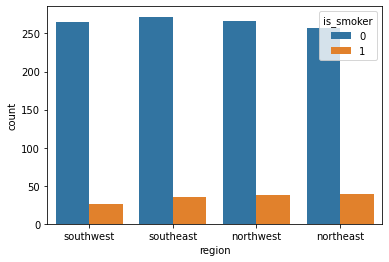

In [47]:
# sns.displot(data=df, x='hospitalization charges', hue='region', kind='kde', palette='tab10', rug=True)
sns.countplot(df['region'],hue=df['is_smoker'])

Visually it appears that there is a slight increase in the number of smokers in northeast region compared to southwest.

**Since both the features (is_smoker and region ) are categorical, we will use Chi-Square test to validate our assumptions.**

In [48]:
df['region'].value_counts()

southeast    307
northwest    305
northeast    296
southwest    291
Name: region, dtype: int64

In [49]:
def nf(row):
  if row['region']=='southeast':
    return 1
  elif row['region']=='northwest':
    return 2
  elif row['region']=='northeast':
    return 3
  else:
    return 4

In [50]:
df['reg_code']=df.apply(nf,axis=1)

In [51]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker,reg_code
0,19,female,yes,southwest,9.30,0,42212,1,4
1,18,male,no,southeast,11.26,1,4314,0,1
2,28,male,no,southeast,11.00,3,11124,0,1
3,33,male,no,northwest,7.57,0,54961,0,2
4,32,male,no,northwest,9.63,0,9667,0,2


NULL Hypothesis: There is no relation between smoking and region.

Alternate Hypothesis: There is some relation between smoking and region.

In [57]:
df_new=pd.crosstab(df['reg_code'],df['is_smoker'])

In [60]:
Observed_Values = df_new.values 

In [61]:
val=stats.chi2_contingency(df_new)

In [62]:
val

(2.974562784179986, 0.3955637450555718, 3, array([[271.66555463,  35.33444537],
        [269.89574646,  35.10425354],
        [261.93160967,  34.06839033],
        [257.50708924,  33.49291076]]))

In [63]:
Expected_Values=val[3]

In [64]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [65]:
chi_square_statistic

2.974562784179986

In [69]:
no_of_rows=df_new.shape[0]
no_of_columns=df_new.shape[1]
degree_of_freedom=(no_of_rows-1)*(no_of_columns-1)

In [70]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=degree_of_freedom)
print('Degree of Freedom: ',degree_of_freedom)
print('p-value:',p_value)

Degree of Freedom:  3
p-value: 0.3955637450555718


Here **p-value >> significance level (5 %**).

**0.39>>0.05**

Therefore, **Accept Null Hypothesis** or **we fail to reject Null Hypothesis**

Which means **Smoker is independent of Region**.

***Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)***

In [71]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,is_smoker,reg_code
0,19,female,yes,southwest,9.30,0,42212,1,4
1,18,male,no,southeast,11.26,1,4314,0,1
2,28,male,no,southeast,11.00,3,11124,0,1
3,33,male,no,northwest,7.57,0,54961,0,2
4,32,male,no,northwest,9.63,0,9667,0,2


In [73]:
female_df=df[df['sex']=='female']

In [74]:
female_df['severity level'].value_counts()

0    269
1    147
2    107
3     71
4     10
5      8
Name: severity level, dtype: int64

In [78]:
zero_sev_level=female_df[female_df['severity level']==0]['viral load']
one_sev_level=female_df[female_df['severity level']==1]['viral load']
two_sev_level=female_df[female_df['severity level']==2]['viral load']

In [106]:
zero_sev_level=zero_sev_level.sample(107)
one_sev_level=one_sev_level.sample(107)

For implementation of ANOVA, we have to check for assumptions.

These are: 

1.The responses for each factor level have a normal population distribution.

2.These distributions have the same variance.

3.The data are independent.

Population Distribution : Normality Check

Test for Normality:QQ plot,Anderson Darling Test,Shapiro Wilk Test

**QQ Plot**

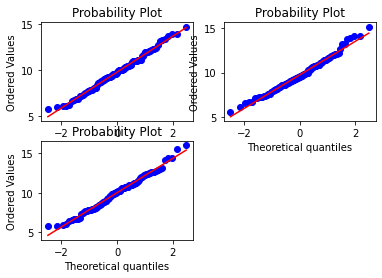

In [107]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(221)
stats.probplot(zero_sev_level, plot=ax)
ax = fig.add_subplot(222)
stats.probplot(one_sev_level, plot=ax)
ax = fig.add_subplot(223)
stats.probplot(two_sev_level, plot=ax)
plt.show()

Visually it appears that all the distributions are Normally distributed.

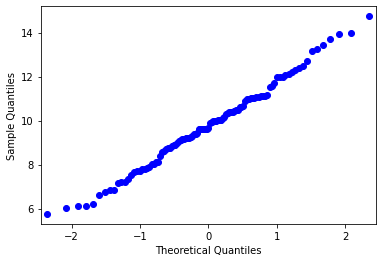

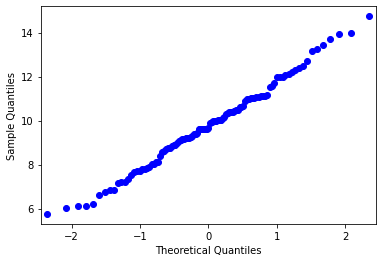

In [108]:
import statsmodels.api as sm
sm.qqplot(zero_sev_level)

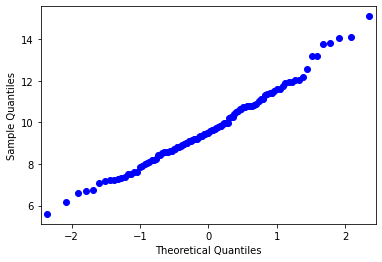

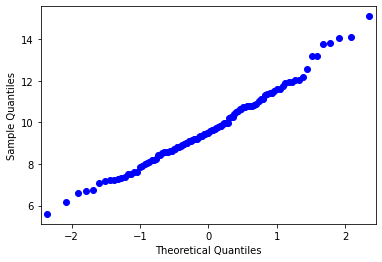

In [109]:
sm.qqplot(one_sev_level)

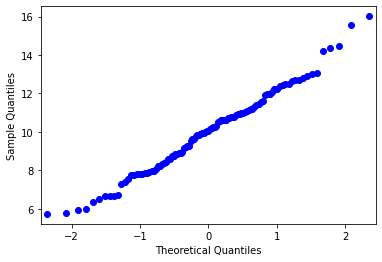

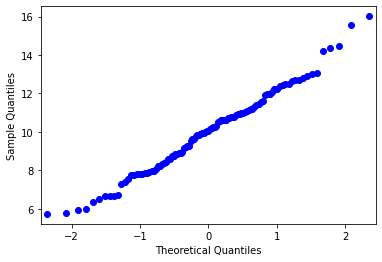

In [110]:
sm.qqplot(two_sev_level)

To statistically answer, using **Shapiro Wilk Test.**

NULL Hypothesis:data was drawn from a normal distribution.

Alternate Hypothesis: Data is not normally distributed.

In [111]:
shapiro_test = stats.shapiro(zero_sev_level)
shapiro_test

(0.9902976751327515, 0.6435118317604065)

In [112]:
shapiro_test = stats.shapiro(one_sev_level)
shapiro_test

(0.9845550060272217, 0.2522813379764557)

In [113]:
shapiro_test = stats.shapiro(two_sev_level)
shapiro_test

(0.9869224429130554, 0.3832924962043762)

Compared to significance level of 5%. All are Normally Distributed.

Checking for 2nd assumption : Distributions having same variance.

**Levens Test:**

Null Hypothesis:Distribution have equal variance.

Alternate Hypotheis: Distribution doesnot have equal variance.

In [114]:
from scipy.stats import levene
levene(zero_sev_level, one_sev_level, two_sev_level)

LeveneResult(statistic=1.3279983380325155, pvalue=0.2664727803513417)

pvalue > significance level.

Therefore,Accepting Null Hypothesis.

**Distributions have equal Variance.**

In [115]:
from scipy.stats import f_oneway

NULL Hypothesis: Groups have same population mean.

Alternate Hypothesis:Groups doesnot have same population mean.

In [116]:
f_oneway(zero_sev_level,one_sev_level,two_sev_level)

F_onewayResult(statistic=0.5535480680951823, pvalue=0.575459326699238)

Here p-value>significance level.

Therefore,accepting NULL Hypothesis.



**Viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level are the same.**

# **Recommendations**

1.Since we have verified viral load in males and females is the same,so treatment of viral cure can be used interchangeably without any gender bais.

2.As the age increases,hospitalisation charges increase.Less expensive Treatment Methods can be formalised for senior aged people to attract more number of patients. 

3.We have found out that smoking tends to increase hospitalisation charges of the patient.Different set of treatment procedures can be devised for patients having smoking history vs non smokers.for quick response time to smoker category as well.

4.Since smoking is independent of region, hospitals in all regions should be able to tackle the smoking history patients.

5.Since viral load in women is same across severity level of 0,1,2. Same kind of treatment can be tried on womens with severity level of 0,1,2.

In [ ]:
# Extra Analysis:::Can be ignored.

In [ ]:
from scipy.stats import anderson
anderson(df['is_smoker'],dist='norm')

AndersonResult(statistic=382.95684581500427, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
anderson(df['hospitalization charges'],dist='norm')

AndersonResult(statistic=34.31786866370112, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Recheck using Shapiro Wilk Test

In [ ]:
from scipy import stats
stats.shapiro(df['is_smoker'])

(0.3702511191368103, 0.0)

In [ ]:
stats.shapiro(df['hospitalization charges'])

(0.8944068551063538, 6.689337772147533e-28)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


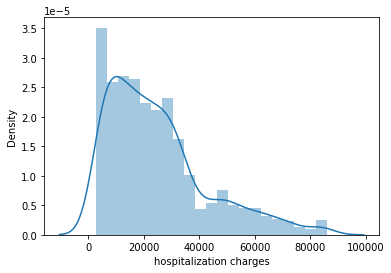

In [ ]:
sns.distplot(df['hospitalization charges'])
# .histplot(df['hospitalization charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


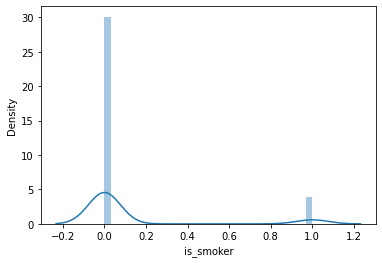

In [ ]:
sns.distplot(df['is_smoker'])

In [ ]:
f_oneway(df['is_smoker'],df['hospitalization charges'])

F_onewayResult(statistic=2253.726883670767, pvalue=0.0)